## **Particle Identification from Detector Responses**


- Four particle types - positron (-11), pion (211), kaon (321), and proton (2212); 
- six detector responses. 
- Some detector responses are zero due to detector inefficiencies or incomplete geometric coverage of the detector.

- **Particle Type (`id`)**: The type of particle detected.
- **Momentum (`p`)**: The momentum of the particle in GeV/c.
- **Theta (`theta`)**: The polar angle (in radians) of the particle's trajectory relative to the beamline.
- **Beta (`beta`)**: The velocity of the particle as a fraction of the speed of light.
- **Number of Photoelectrons (`nphe`)**: The number of photoelectrons detected in the particle's interaction.
- **Inner Energy (`ein`)**: The energy deposited in the inner part of the detector (in GeV).
- **Outer Energy (`eout`)**: The energy deposited in the outer part of the detector (in GeV).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the csv file and making a shallow copy of it so the original dataframe remains intact

In [ ]:
df=pd.read_csv('pid-5M.csv')
df_copy = df.copy()

In [ ]:
df_copy

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
4999995,211,0.835889,0.495847,0.975812,0,0.000000,0.046967
4999996,211,2.027470,0.287966,1.222890,0,0.197894,0.186404
4999997,211,0.827497,0.689746,0.980957,0,0.000000,0.000000
4999998,2212,1.331200,0.382746,0.811818,0,0.036942,0.056947


In [ ]:
#checking the number of rows and columns in the data
df_copy.shape

(5000000, 7)

In [ ]:
#here we are checking for any null values but as you can see there are no null values
df_copy.isna().sum()

id       0
p        0
theta    0
beta     0
nphe     0
ein      0
eout     0
dtype: int64

In [ ]:
#here we are checking for the datatype of the values, as we can see the data types seem appropriate , I mean a numerical column does not have object as a category which is a good sign
df_copy.dtypes

id         int64
p        float64
theta    float64
beta     float64
nphe       int64
ein      float64
eout     float64
dtype: object

In [ ]:
#here we are checking the summary of the data along descriptive statistics
df_copy.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


In [ ]:
#here i am checking the count of unique values of column id  which is out class label , these 4 values correspond to 4 different subatomic particles
#Four particle types - positron (-11), pion (211), kaon (321), and proton (2212)
df_copy.id.value_counts()

id
 211     2806833
 2212    1945849
 321      232471
-11        14847
Name: count, dtype: int64

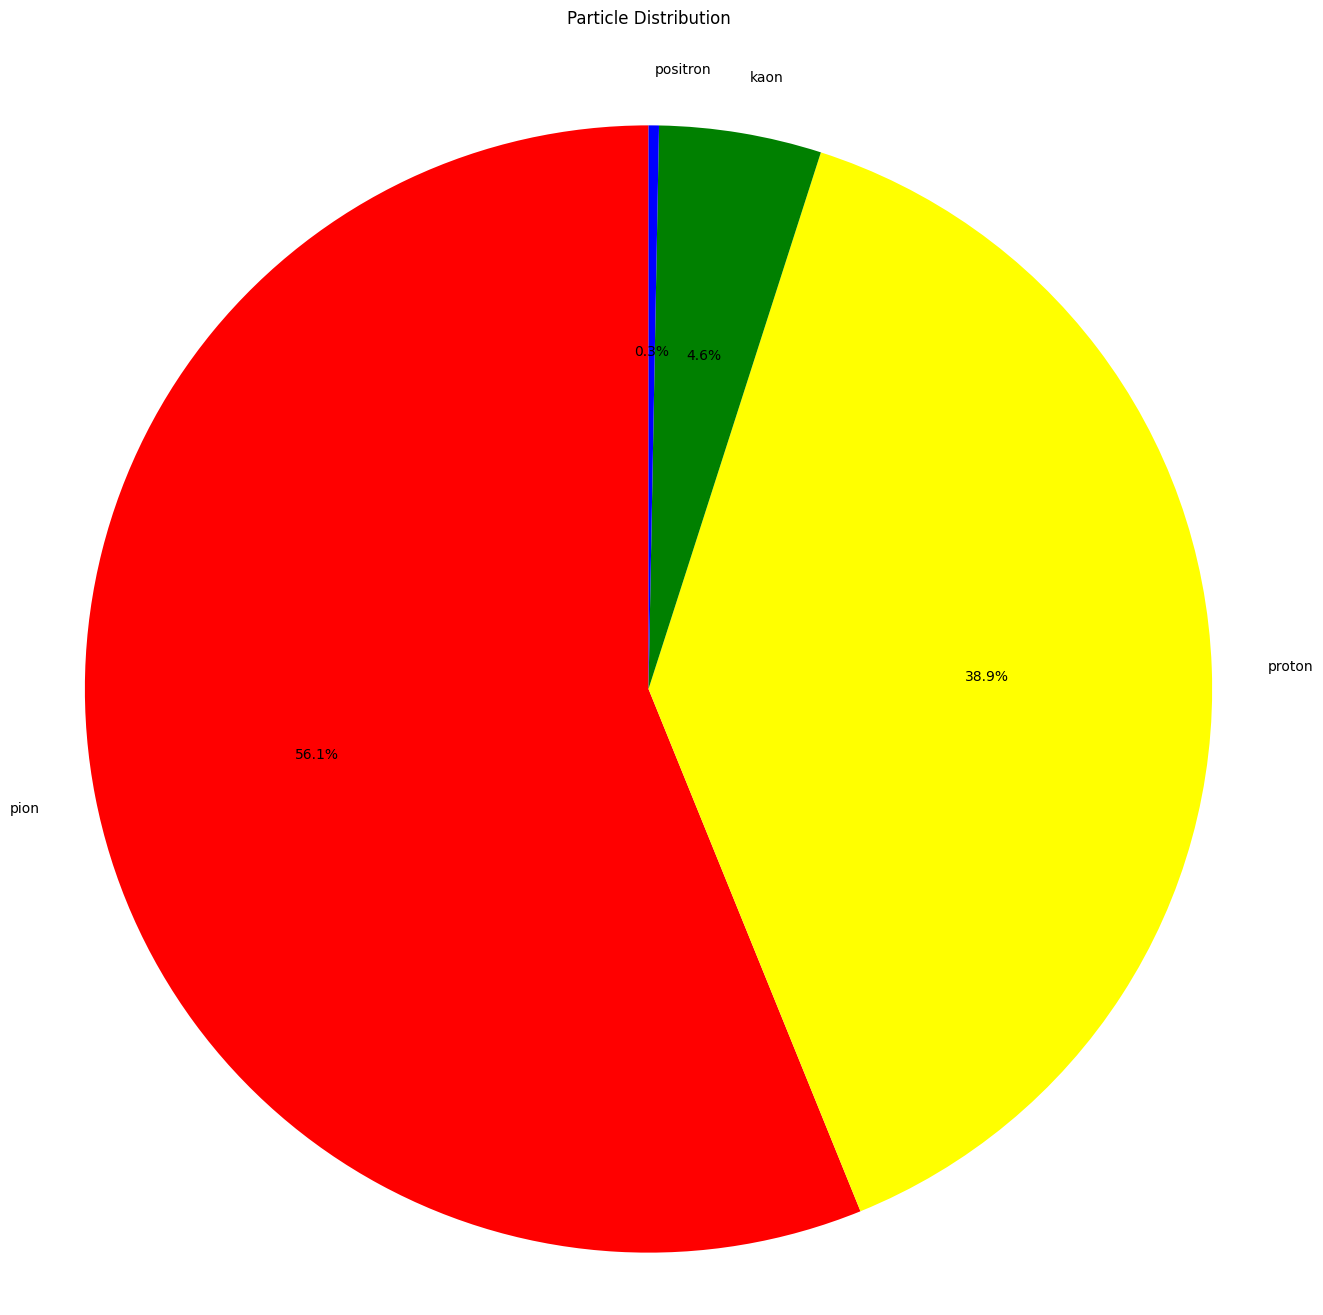

In [ ]:
id_map ={211:'pion',2212:'proton',321:'kaon',-11:'positron'}

particle_count=df_copy.id.map(id_map).value_counts()

plt.figure(figsize=(16, 16))
plt.pie(particle_count, labels=particle_count.index, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow','green','blue'])
plt.title("Particle Distribution\n\n")
plt.axis('equal')  # Makes the pie a circle
plt.show()

#from this we can see that the major contributor of our dataset are pion and protons followed by kaon and positron

## Observation

- data is highly imbalanced
- majority particles are pion and proton
- followed by kaon and positron


C:\Users\Sangmesh\AppData\Local\Temp\ipykernel_7056\3670946516.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy['id'].map(id_map), data=df, palette='Set2')


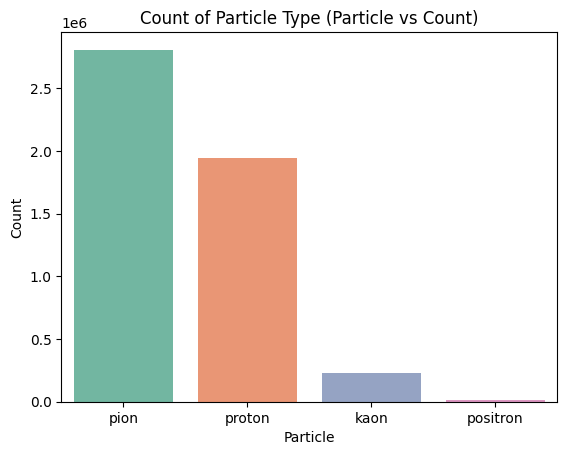

In [ ]:
sns.countplot(x=df_copy['id'].map(id_map), data=df, palette='Set2')
plt.title("Count of Particle Type (Particle vs Count)")
plt.xlabel("Particle")
plt.ylabel("Count")
plt.show()

# Observation
- here i am finding out the percentage of particles and plotting a particle vs their count plot in order to see the variation in number of particles in the dataset
-from this again i could infer that data is imabalanced and I need to balance it

In [ ]:
features = ['p', 'theta', 'beta', 'nphe', 'ein', 'eout']

# Downsampling the dataset because the dataset is highly imabalanced which would lead to a biased model

In [ ]:
df_copy.id.value_counts()
#see the data is highly imbalanced

id
 211     2806833
 2212    1945849
 321      232471
-11        14847
Name: count, dtype: int64

In [ ]:

#replacing the id
df_copy.id=df_copy.id.map({-11:0,211:1,321:2,2212:3})




#### here we are making different dataframes for each particle, downsample it to the lost count particle size and then combine those

In [ ]:
#pion class
df_pion=df_copy[df_copy.id==1]
df_pion = df_pion.sample(14847, random_state=42) 
df_pion.info()
df_pion['id'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 14847 entries, 3938363 to 1837915
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14847 non-null  int64  
 1   p       14847 non-null  float64
 2   theta   14847 non-null  float64
 3   beta    14847 non-null  float64
 4   nphe    14847 non-null  int64  
 5   ein     14847 non-null  float64
 6   eout    14847 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 927.9 KB


id
1    14847
Name: count, dtype: int64

In [ ]:
#proton class
df_proton = df_copy[df_copy['id'] == 3]
df_proton = df_proton.sample(14847, random_state=42) 
df_proton.info()
df_proton['id'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 14847 entries, 2324413 to 3385660
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14847 non-null  int64  
 1   p       14847 non-null  float64
 2   theta   14847 non-null  float64
 3   beta    14847 non-null  float64
 4   nphe    14847 non-null  int64  
 5   ein     14847 non-null  float64
 6   eout    14847 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 927.9 KB


id
3    14847
Name: count, dtype: int64

In [ ]:
#kaon class
df_kaon = df_copy[df_copy.id == 2]
df_kaon = df_kaon.sample(14847, random_state=42) 
df_kaon.info()
df_kaon['id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 14847 entries, 4390272 to 1200628
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14847 non-null  int64  
 1   p       14847 non-null  float64
 2   theta   14847 non-null  float64
 3   beta    14847 non-null  float64
 4   nphe    14847 non-null  int64  
 5   ein     14847 non-null  float64
 6   eout    14847 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 927.9 KB


id
2    14847
Name: count, dtype: int64

In [ ]:
#positron class
df_positron=df_copy[df_copy.id==0]
df_positron.info()
df_positron['id'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 14847 entries, 143 to 4999605
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14847 non-null  int64  
 1   p       14847 non-null  float64
 2   theta   14847 non-null  float64
 3   beta    14847 non-null  float64
 4   nphe    14847 non-null  int64  
 5   ein     14847 non-null  float64
 6   eout    14847 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 927.9 KB


id
0    14847
Name: count, dtype: int64

In [ ]:
#combined df
frames =[df_pion,df_kaon,df_proton,df_positron]

result = pd.concat(frames)
df_copy=result.sample(59388, random_state=42)
df_copy=df_copy.reset_index(drop=True)
df_copy

,id,p,theta,beta,nphe,ein,eout
0,1,1.042800,0.298184,1.001500,0,0.085145,0.081895
1,0,0.305638,0.481411,0.997903,0,0.000000,0.000000
2,3,1.447780,0.213879,0.849882,0,0.099153,0.052277
3,1,2.817430,0.397210,0.986659,0,0.038498,0.036438
4,1,0.460517,1.130720,0.966259,0,0.000000,0.000000
...,...,...,...,...,...,...,...
59383,0,0.775158,0.217502,0.986422,35,0.150973,0.070405
59384,3,1.162130,0.187289,0.779051,0,0.059327,0.243534
59385,1,1.679560,0.313132,1.012020,0,0.024994,0.188602
59386,2,0.372473,0.507745,0.593533,0,0.000000,0.000000


In [ ]:
df_copy['id'].value_counts()


id
1    14847
0    14847
3    14847
2    14847
Name: count, dtype: int64

In [ ]:
df_copy.describe()

,id,p,theta,beta,nphe,ein,eout
count,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000
mean,1.500000,1.202445,0.451422,0.921713,8.735418,0.061666,0.064323
std,1.118043,0.793516,0.262418,0.107362,27.338012,0.082817,0.096917
min,0.000000,0.210117,0.093801,0.550015,0.000000,0.000000,0.000000
25%,0.750000,0.562295,0.270719,0.877553,0.000000,0.000000,0.000000
50%,1.500000,1.001910,0.379852,0.970314,0.000000,0.034150,0.040467
75%,2.250000,1.692417,0.553020,0.994622,0.000000,0.087034,0.080751
max,3.000000,5.021130,2.171140,1.499590,346.000000,0.842893,1.000460


In [ ]:
#no null values
df_copy.isna().sum()

id       0
p        0
theta    0
beta     0
nphe     0
ein      0
eout     0
dtype: int64

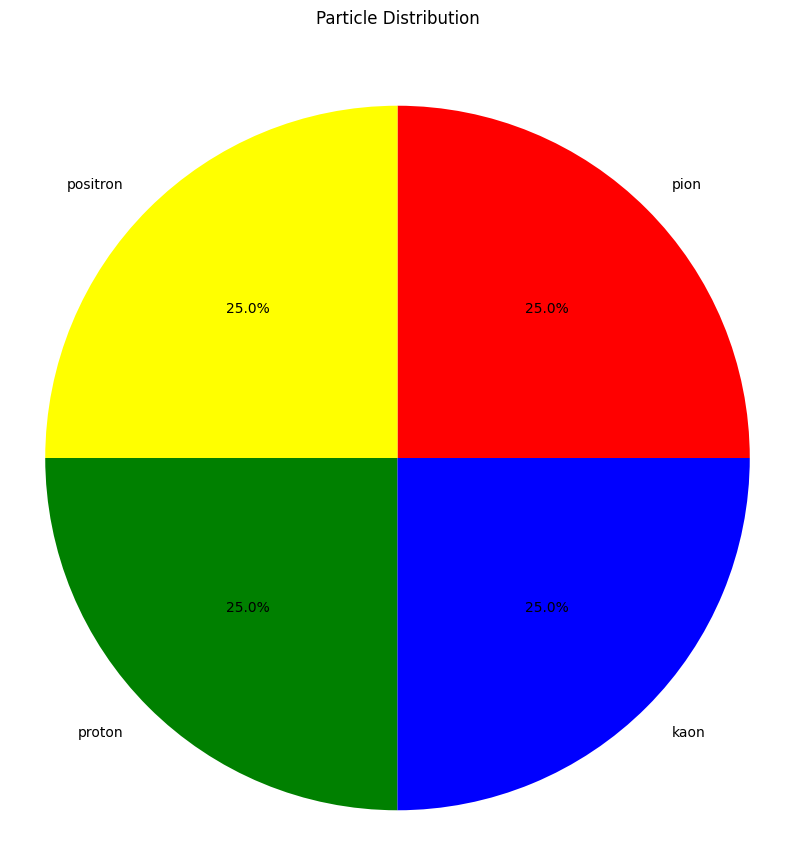

In [ ]:
id_map={0:'positron',1:'pion',2:'kaon',3:'proton'}
particle_count=df_copy.id.map(id_map).value_counts()

plt.figure(figsize=(10, 10))
plt.pie(particle_count, labels=particle_count.index, autopct='%1.1f%%', colors=['red', 'yellow','green','blue'])
plt.title("Particle Distribution\n\n")
plt.axis('equal')  # Makes the pie a circle
plt.show()

# Observation 
- the dataset is now balanced

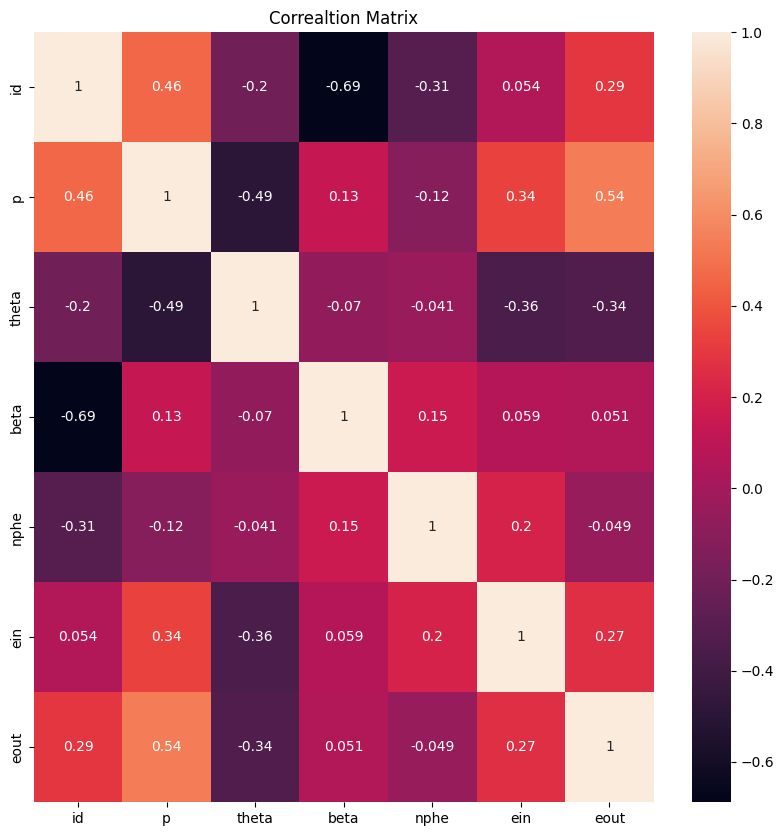

In [ ]:
#plotting the correaltion matrix

plt.figure(figsize=(10,10))

sns.heatmap(df_copy.corr(),annot=True)
plt.title('Correaltion Matrix')
plt.show()


# Observations

- momentum and ein,eout are positively correlated which means more the momentum ,more the energy that gets absorbed into the inner and outer part of cherenkov detectors
- the theta (the initial angle of particle's trajectory) and ein and eout are negatively correalted it means as the angle of trajectory deviates from head-on collision the ein and eout decrease
- the ein and eout are positively correlated which means they tend to increase or decrease together which also hold true for above point
- ein is the energy deposited in the inner part of the detector 
- eout is the energy deposited int he outer part of the detector so if there is increase in the theta between the particle and the collider less of its energy will be captured in the outer part of the detector and in the inner even more less, due to scattering or decay and here the theta is more correlated to ein than eout which proves our statement to be true
- the beta and the p(momentum) are positively correlated because as the relative speed wrt.  light increases so does the momentum which is true
- the momentum(p) and theta have a negative correlation indicating as angle increases momentum decreases



<Figure size 2000x1000 with 0 Axes>

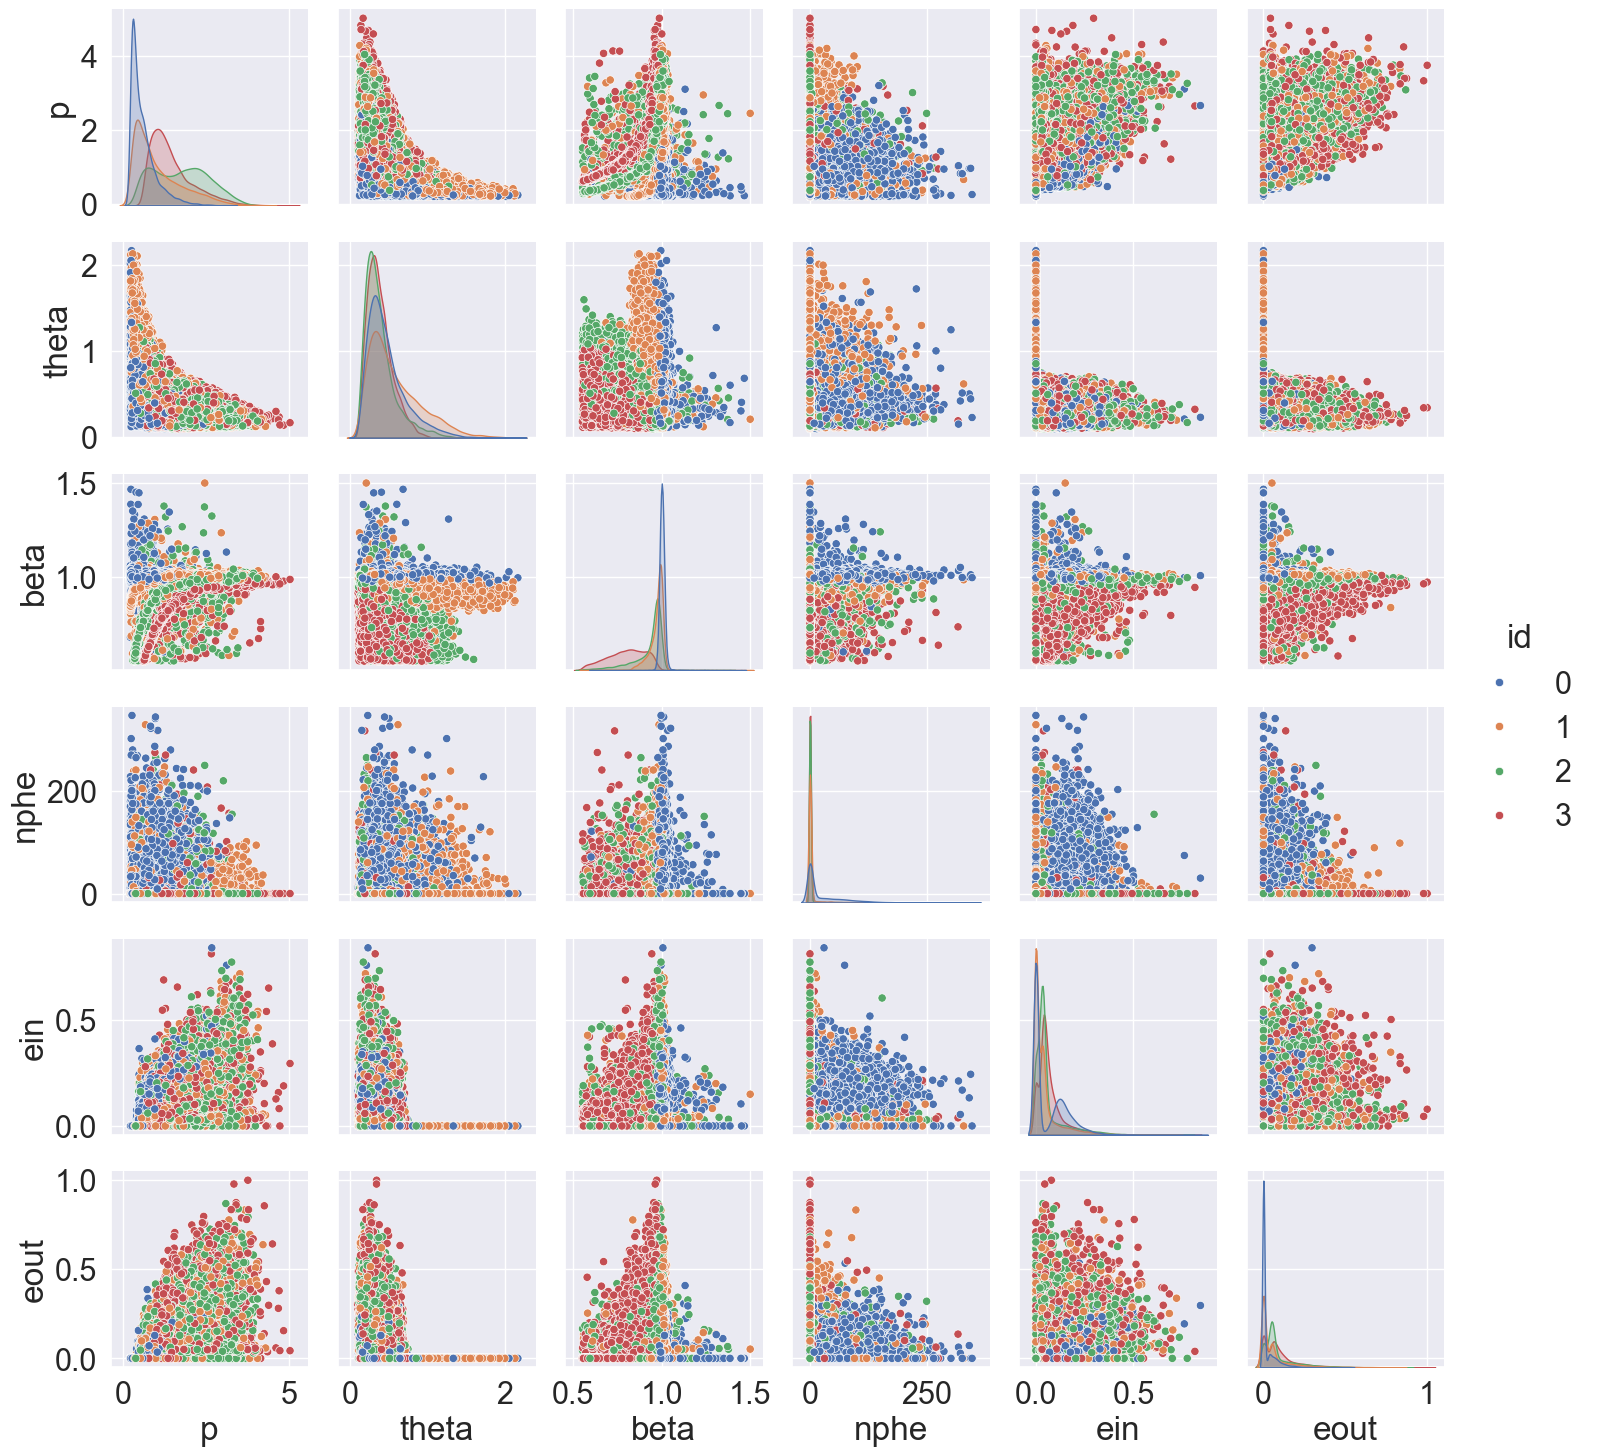

In [ ]:
df1 = df_copy[['p', 'theta', 'beta', 'nphe', 'ein', 'eout', 'id']]
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
sns.pairplot(df1, hue="id", palette="deep")

In [ ]:
df_copy['particle'] = df_copy['id'].map(id_map)
df_copy

,id,p,theta,beta,nphe,ein,eout,particle
0,1,1.042800,0.298184,1.001500,0,0.085145,0.081895,pion
1,0,0.305638,0.481411,0.997903,0,0.000000,0.000000,positron
2,3,1.447780,0.213879,0.849882,0,0.099153,0.052277,proton
3,1,2.817430,0.397210,0.986659,0,0.038498,0.036438,pion
4,1,0.460517,1.130720,0.966259,0,0.000000,0.000000,pion
...,...,...,...,...,...,...,...,...
59383,0,0.775158,0.217502,0.986422,35,0.150973,0.070405,positron
59384,3,1.162130,0.187289,0.779051,0,0.059327,0.243534,proton
59385,1,1.679560,0.313132,1.012020,0,0.024994,0.188602,pion
59386,2,0.372473,0.507745,0.593533,0,0.000000,0.000000,kaon


<Axes: title={'center': 'Particle vs Angle distribution'}, xlabel='theta', ylabel='Density'>

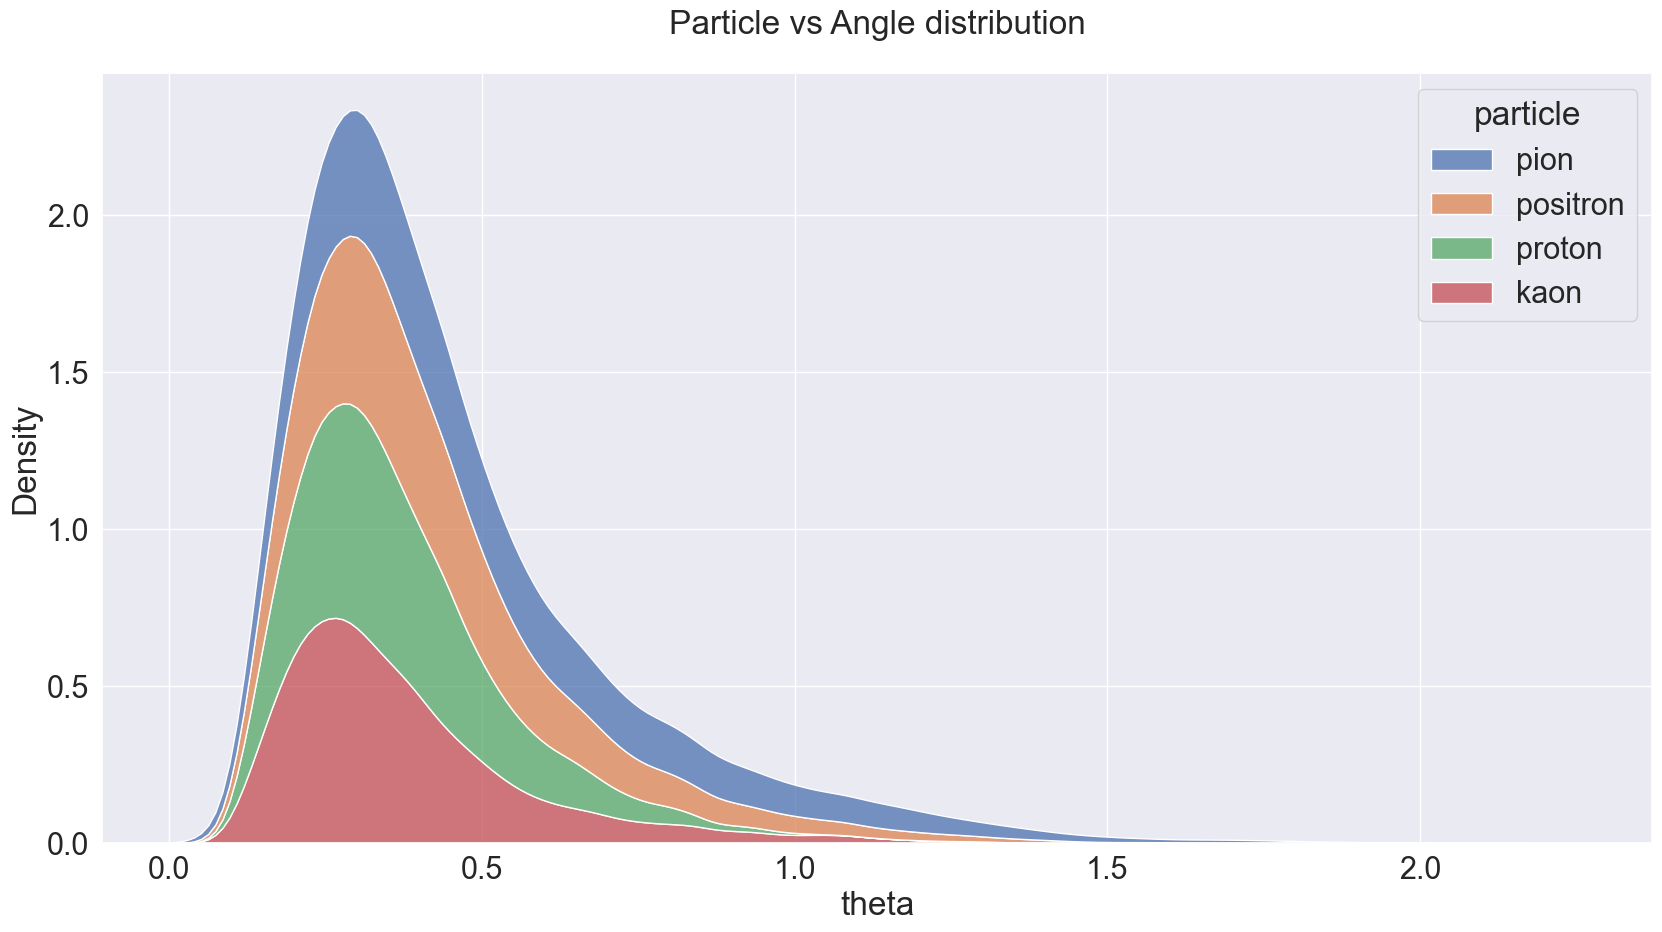

In [ ]:
#plotting a kde plot to get the distribution of particles wrt to angles
plt.figure(figsize=(20, 10))
plt.title("Particle vs Angle distribution", y=1.04)
sns.kdeplot(data=df_copy, x="theta", hue="particle", multiple="stack")

###  Inference from KDE Plot (Theta vs Particle)

#### 🟦 **Pion**
- Has the **highest density** for small `theta` values.
- Distribution is **strongly peaked around ~0.3 radians**.
- Indicates most pions are emitted at **smaller angles**.

#### 🟧 **Positron** & 🟩 **Proton**
- Both concentrate around **small angles**, but with **slightly broader spreads** than pions.
- **Positrons** appear just under pions in terms of density.
- **Protons** have a **flatter** distribution, suggesting **more variance** in emission angle.

#### 🟥 **Kaon**
- Has the **broadest and lowest peak**.
- Indicates more **spread in angular distribution** — kaons are detected at **wider angles** compared to others.



<Axes: title={'center': 'momentum vs beta (relative speed w.r.t light)'}, xlabel='beta', ylabel='p'>

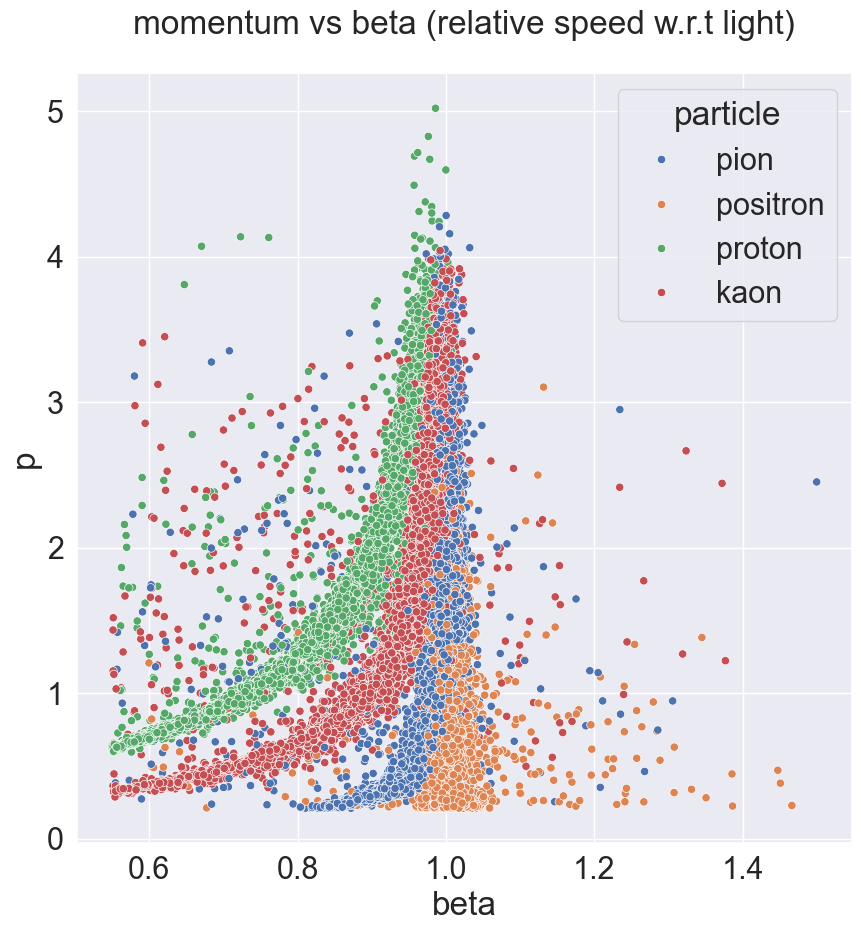

In [ ]:
#plotting momentum vs beta
plt.figure(figsize=(10, 10))
plt.title("momentum vs beta (relative speed w.r.t light)", y=1.04)
sns.scatterplot(data=df_copy, x='beta', y='p', hue='particle', palette="deep")

### Inference from Scatter Plot (Momentum `p` vs Beta `β`)

This plot illustrates the relationship between a particle's momentum (`p`) and its speed relative to light (`beta`).

#### 🟠 **Positron**
- Clustered near **β ≈ 1**, consistent with their very **small mass**.
- Can attain **high speeds** even at low momentum.
- Some points lie beyond β = 1, possibly due to **experimental noise or errors**.

#### 🔵 **Pion**
- Also tightly packed around **β ≈ 1**, but with **higher momentum** range than positrons.
- Slightly more mass than positrons, hence needing more momentum to maintain β near 1.

#### 🔴 **Kaon**
- Spread below β = 1, indicating **heavier mass**.
- Distribution shows kaons require **more momentum to reach high β** compared to pions/positrons.

#### 🟢 **Proton**
- Heaviest among the particles shown.
- Clearly separated curve: requires **significantly more momentum** to approach β ≈ 1.
- The most distinguishable curve, due to the **inverse relation between mass and β at constant momentum**.



<Axes: title={'center': 'Momentum vs Theta'}, xlabel='theta', ylabel='p'>

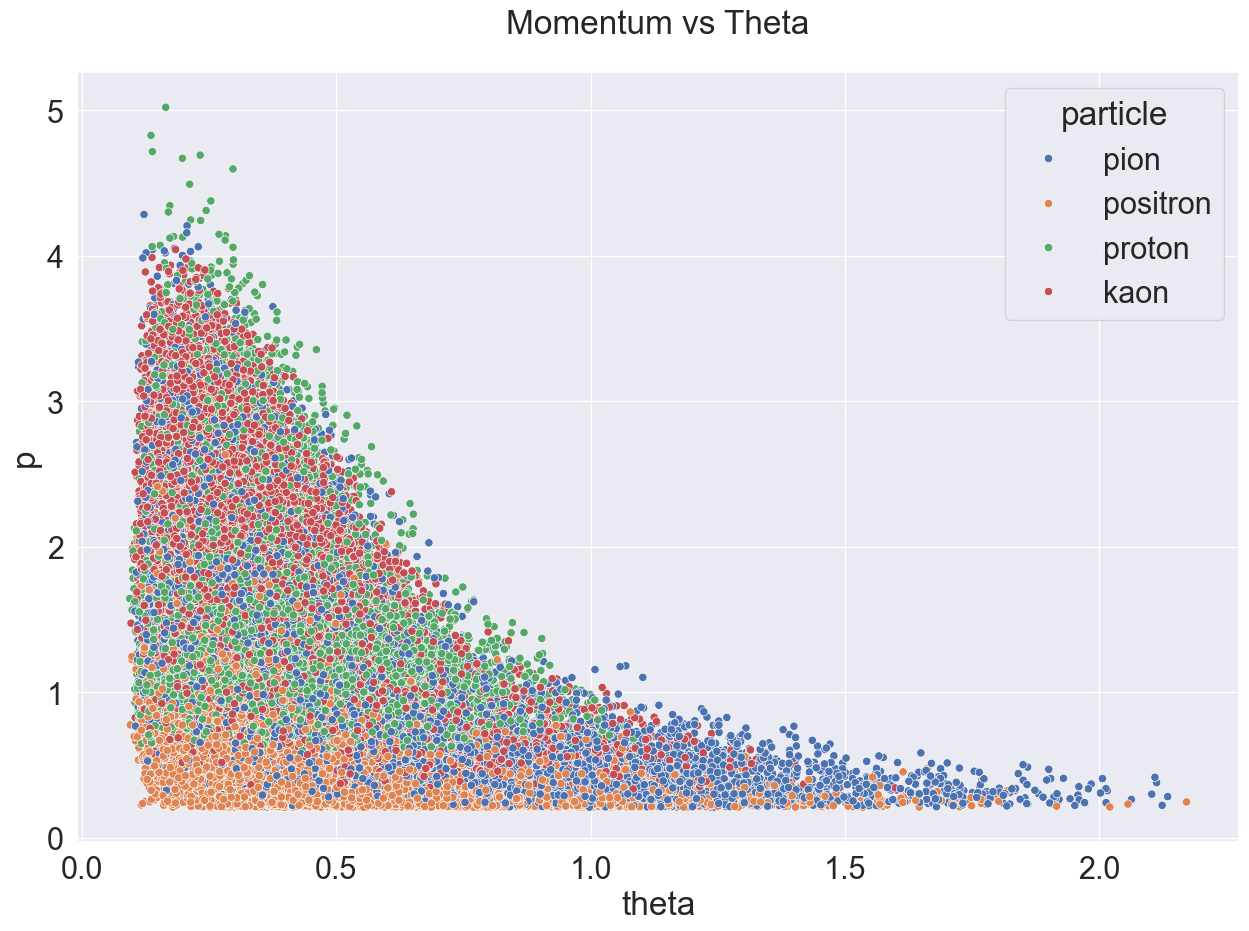

In [ ]:
#plotting momentum vs theta
plt.figure(figsize=(15, 10))
sns.set(font_scale=2.0)
plt.title("Momentum vs Theta", y=1.04)
sns.scatterplot(data=df_copy, x='theta', y='p', hue='particle', palette="deep")

# Observation

- here as the angle increases the momentum decreases
- proton (green) here is the heaviest so small change in angle leads to significant decrease in momentum
- all particles have strong negative correation between momentum and theta

<Axes: title={'center': 'Beta vs ein'}, xlabel='ein', ylabel='beta'>

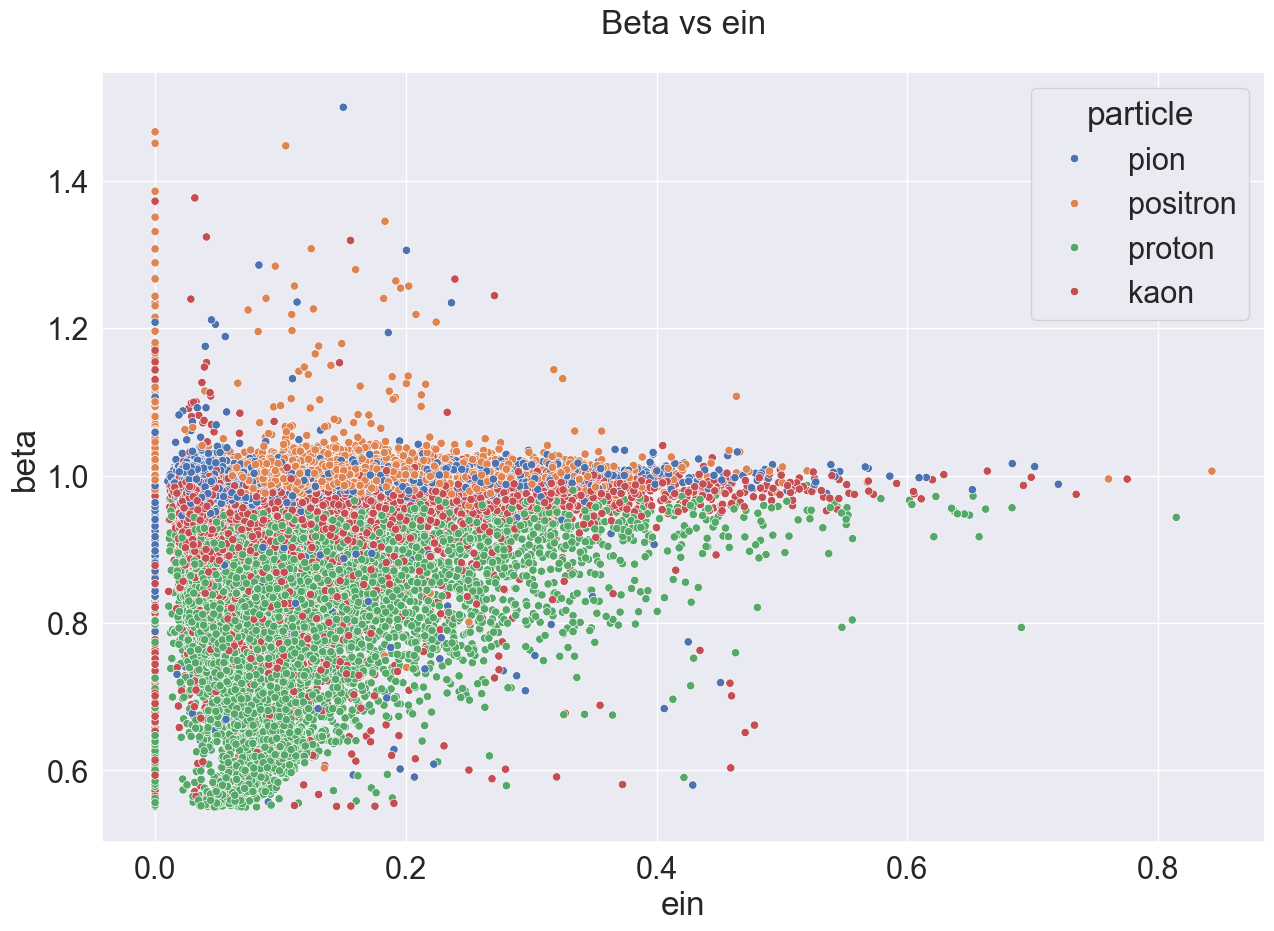

In [ ]:
#this will show beta vs ein
plt.figure(figsize=(15, 10))
sns.set(font_scale=2.0)
plt.title("Beta vs ein", y=1.04)
sns.scatterplot(data=df_copy, x='ein', y='beta', hue='particle', palette="deep")

## Inference: Beta vs Ein Scatter Plot

In this plot, we visualize the relationship between **beta** (y-axis) and **ein** (x-axis) 
<br>for various particle types. The particles are differentiated by color.

### Observations:
- **Positive Correlation**: As observed, there is a clear positive correlation between **beta** and **ein**.
  <br>As the value of **beta** approaches 1, the value of **ein** also increases.
- **Beta and Ein Relationship**: This indicates that for the particles in the dataset, when **beta** increases, the **ein** also increases.
- **Particle Distribution**: The relationship holds across all particle types.


In [ ]:
#deleted particle column as it is not needed
df_copy.pop('particle')

0            pion
1        positron
2          proton
3            pion
4            pion
           ...   
59383    positron
59384      proton
59385        pion
59386        kaon
59387    positron
Name: particle, Length: 59388, dtype: object

In [ ]:
df_copy

,id,p,theta,beta,nphe,ein,eout
0,1,1.042800,0.298184,1.001500,0,0.085145,0.081895
1,0,0.305638,0.481411,0.997903,0,0.000000,0.000000
2,3,1.447780,0.213879,0.849882,0,0.099153,0.052277
3,1,2.817430,0.397210,0.986659,0,0.038498,0.036438
4,1,0.460517,1.130720,0.966259,0,0.000000,0.000000
...,...,...,...,...,...,...,...
59383,0,0.775158,0.217502,0.986422,35,0.150973,0.070405
59384,3,1.162130,0.187289,0.779051,0,0.059327,0.243534
59385,1,1.679560,0.313132,1.012020,0,0.024994,0.188602
59386,2,0.372473,0.507745,0.593533,0,0.000000,0.000000


# Machine Learning


 Accuracy Table for Train:Test Ratio 70:30
--------------------------------------------------
KNN                  ➤ Accuracy: 0.9199
Decision Tree        ➤ Accuracy: 0.9159
Naive Bayes          ➤ Accuracy: 0.6942
Random Forest        ➤ Accuracy: 0.9438
Logistic Regression  ➤ Accuracy: 0.7656

 Accuracy Table for Train:Test Ratio 80:20
--------------------------------------------------
KNN                  ➤ Accuracy: 0.9201
Decision Tree        ➤ Accuracy: 0.9154
Naive Bayes          ➤ Accuracy: 0.6959
Random Forest        ➤ Accuracy: 0.9453
Logistic Regression  ➤ Accuracy: 0.7668

 Accuracy Table for Train:Test Ratio 50:50
--------------------------------------------------
KNN                  ➤ Accuracy: 0.9169
Decision Tree        ➤ Accuracy: 0.9165
Naive Bayes          ➤ Accuracy: 0.6938
Random Forest        ➤ Accuracy: 0.9427
Logistic Regression  ➤ Accuracy: 0.7551

 Accuracy Table for Train:Test Ratio 10:90
--------------------------------------------------
KNN                 

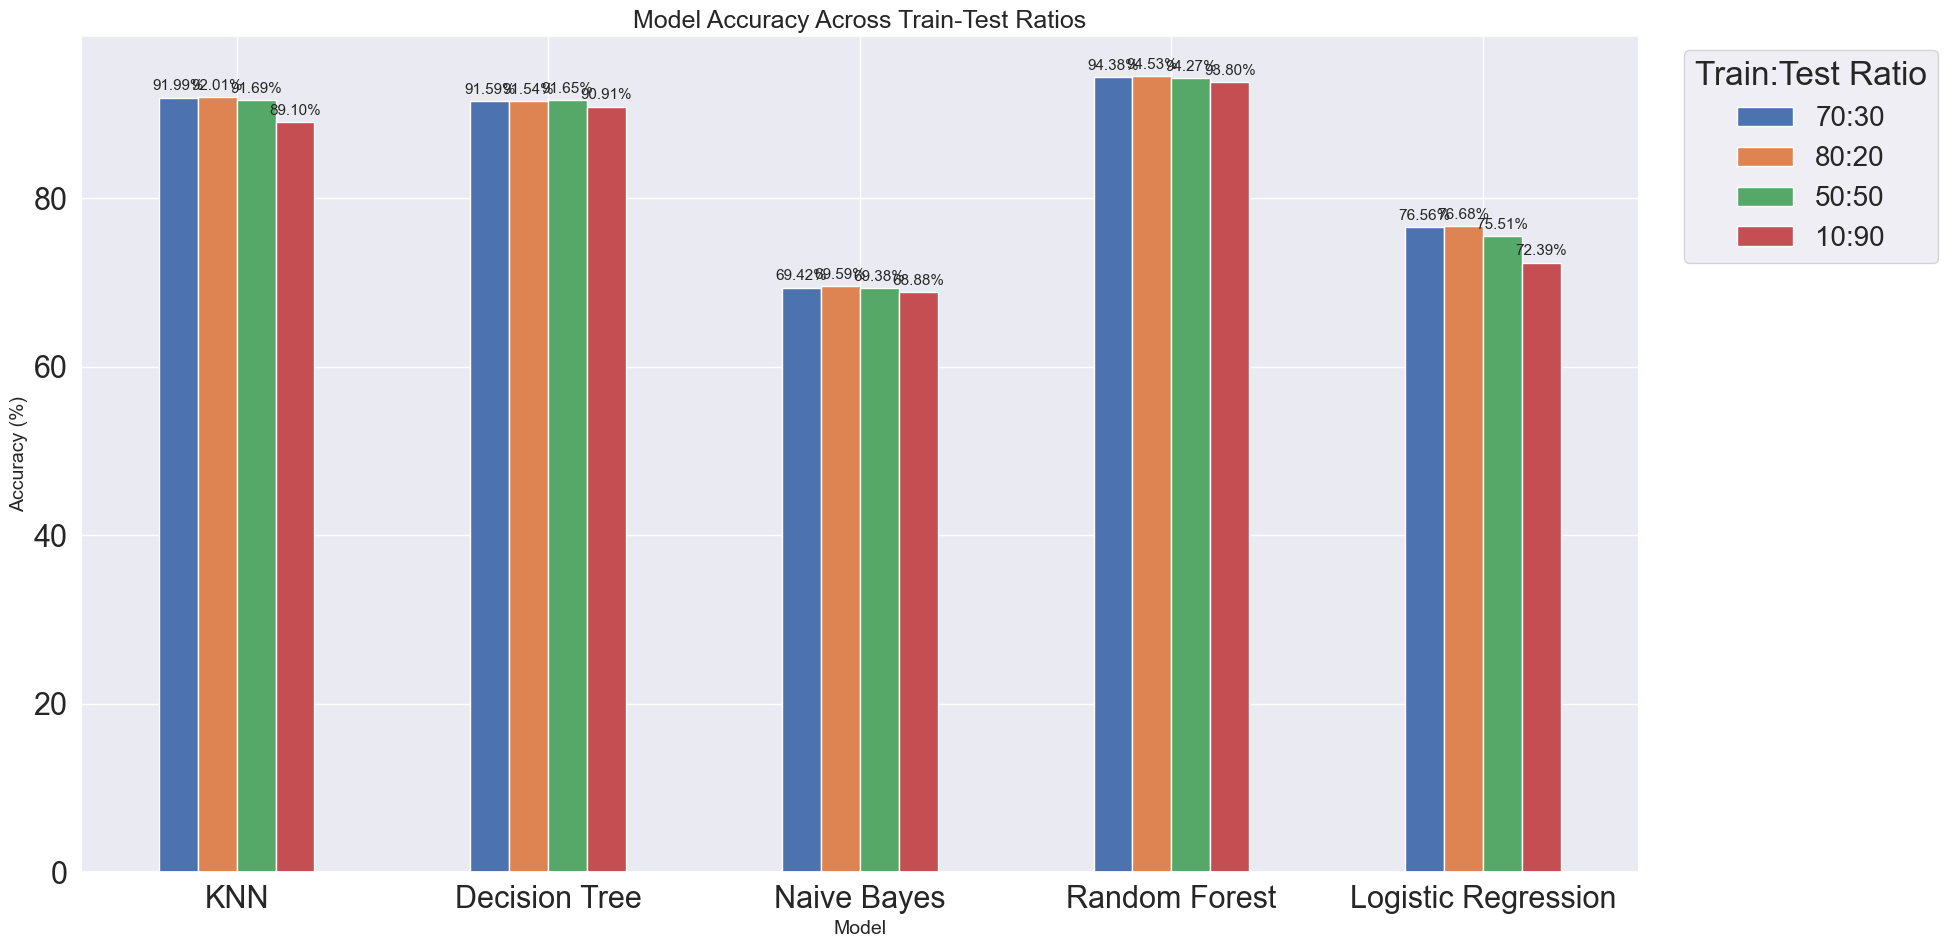

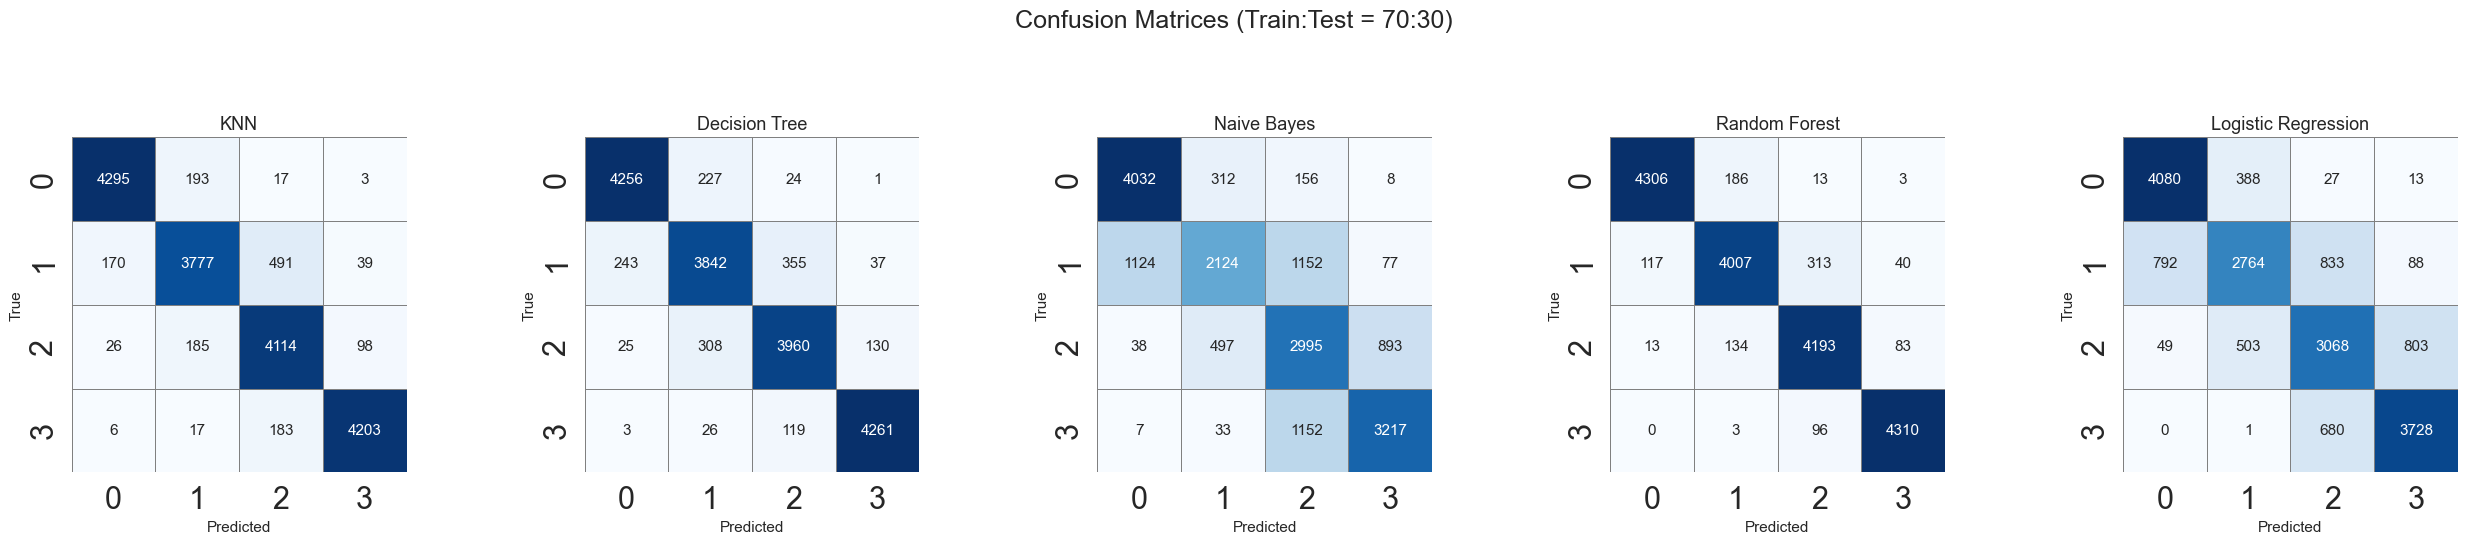

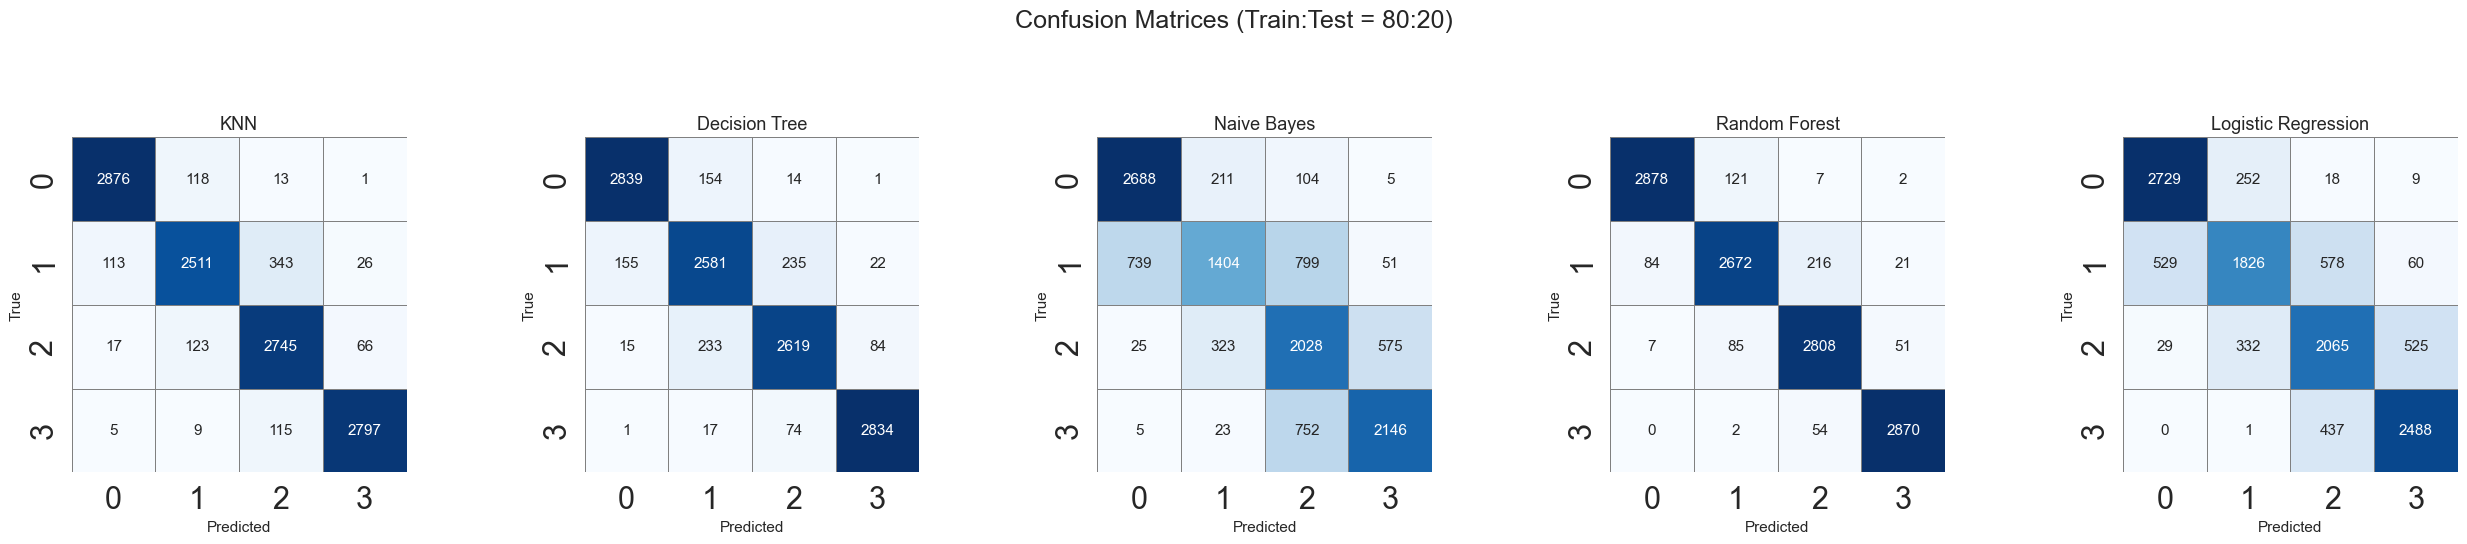

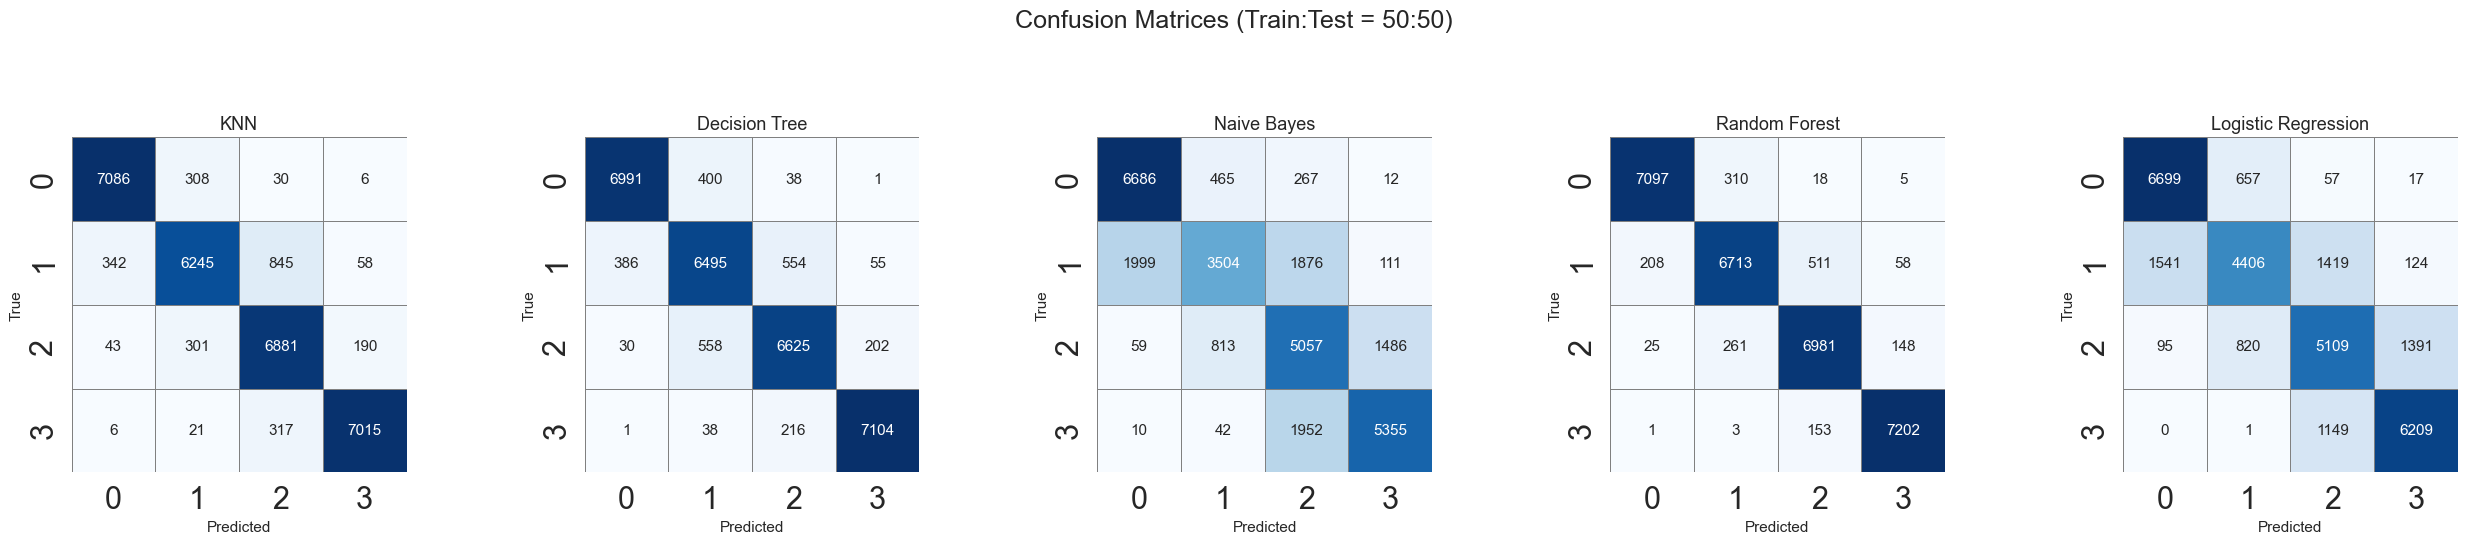

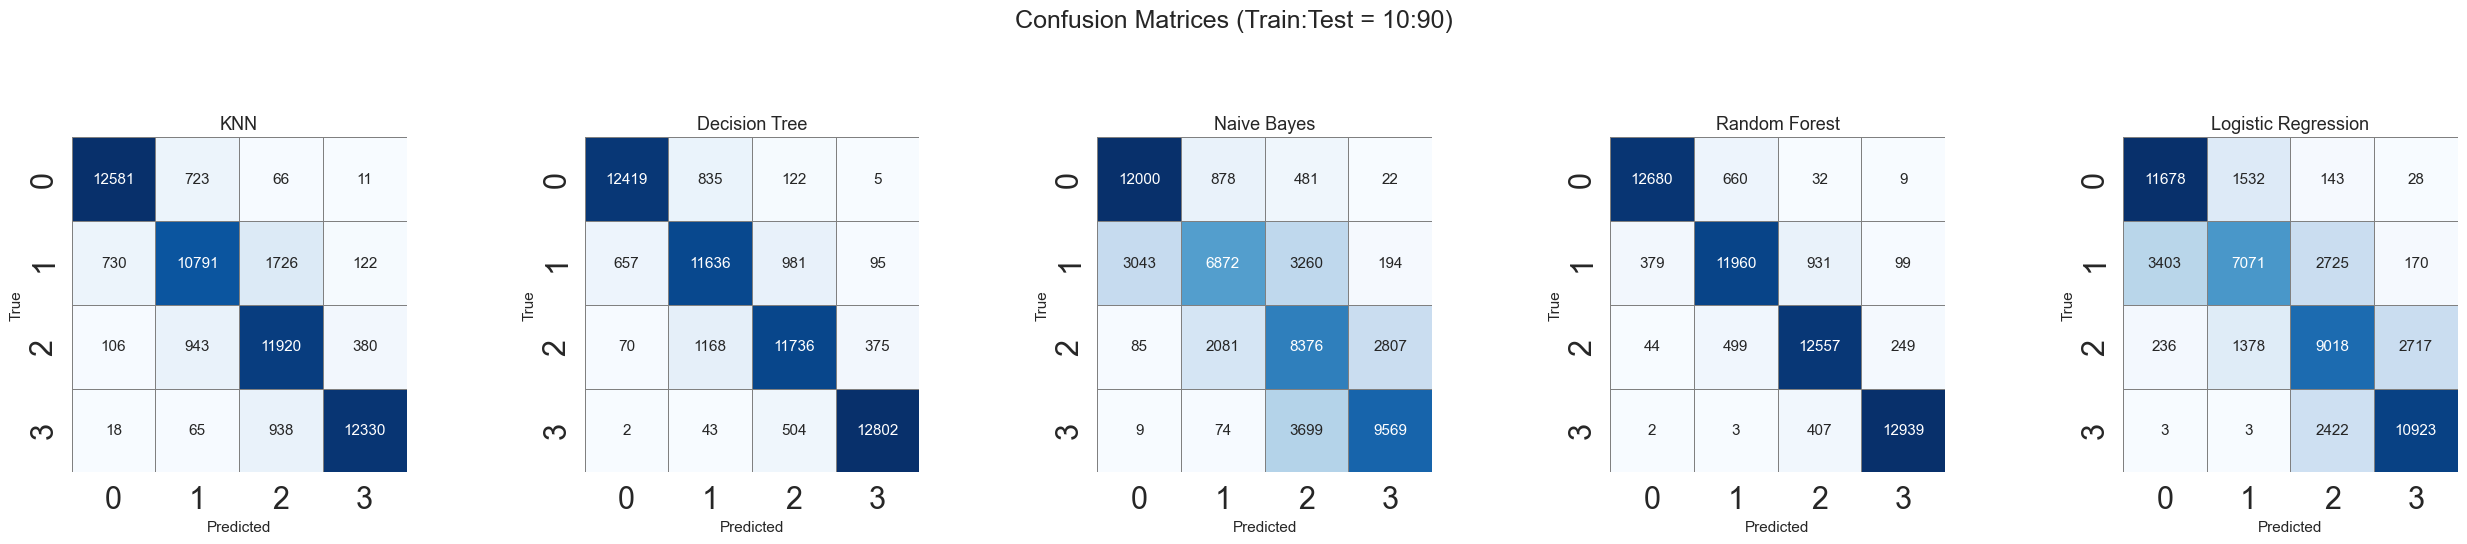

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# ---------------------------
# 1. Prepare features & target
# ---------------------------

X = df_copy.drop(['id'], axis=1)
y = df_copy['id']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 2. Define models & split ratios
# ---------------------------

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),
    'Logistic Regression': LogisticRegression(max_iter=500, solver='liblinear')
}

ratios = [(0.7, 0.3), (0.8, 0.2), (0.5, 0.5),(0.1,0.9)]
accuracy_results = {ratio: [] for ratio in ratios}
conf_matrices = {ratio: {} for ratio in ratios}  # For storing confusion matrices

# ---------------------------
# 3. Train, Evaluate, Collect Accuracies + Confusion Matrices
# ---------------------------

for ratio in ratios:
    train_size, test_size = ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, train_size=train_size, test_size=test_size, random_state=42
    )

    print(f"\n Accuracy Table for Train:Test Ratio {int(train_size*100)}:{int(test_size*100)}")
    print("-" * 50)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        accuracy_results[ratio].append(acc)
        conf_matrices[ratio][model_name] = confusion_matrix(y_test, y_pred)

        print(f"{model_name:<20} ➤ Accuracy: {acc:.4f}")

# ---------------------------
# 4. Convert Accuracy to DataFrame (%)
# ---------------------------

accuracy_df = pd.DataFrame(accuracy_results, index=models.keys()) * 100
accuracy_df.columns = [f"{int(r[0]*100)}:{int(r[1]*100)}" for r in accuracy_df.columns]

# ---------------------------
# 5. Grouped Accuracy Bar Plot (Zoomed + % Labels)
# ---------------------------

fig, ax = plt.subplots(figsize=(20, 10))  # Zoomed in
bars = accuracy_df.plot(kind='bar', ax=ax)

ax.set_title("Model Accuracy Across Train-Test Ratios", fontsize=18)
ax.set_ylabel("Accuracy (%)", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_xticklabels(accuracy_df.index, rotation=0)
ax.legend(title='Train:Test Ratio', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=20)

# Add % labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=11, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

# ---------------------------
# 6. Plot Confusion Matrices (Subplots for each ratio)
# ---------------------------

labels = np.unique(y)

for ratio in conf_matrices:
    fig, axs = plt.subplots(1, len(models), figsize=(5.2 * len(models), 5.5))
    fig.suptitle(f'Confusion Matrices (Train:Test = {int(ratio[0]*100)}:{int(ratio[1]*100)})', fontsize=18)

    for ax, (model_name, cm) in zip(axs, conf_matrices[ratio].items()):
        df_cm = pd.DataFrame(cm, index=labels, columns=labels)
        sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    linewidths=0.5, linecolor='gray', square=True,
                    annot_kws={"fontsize": 11}, ax=ax)
        ax.set_title(model_name, fontsize=13)
        ax.set_xlabel('Predicted', fontsize=11)
        ax.set_ylabel('True', fontsize=11)

    plt.tight_layout(rect=[0, 0.03, 1, 0.92])
    plt.show()


##  Accuracy Comparison and Inference

###  Accuracy Results for Different Train-Test Ratios

**Train:Test Ratio = 70:30**  
--------------------------------------------------  
- **KNN**: 91.99%  
- **Decision Tree**: 91.57%  
- **Naive Bayes**: 69.42%  
- **Random Forest**: 94.32%  
- **Logistic Regression**: 76.56%  

**Train:Test Ratio = 80:20**  
--------------------------------------------------  
- **KNN**: 92.01%  
- **Decision Tree**: 91.65%  
- **Naive Bayes**: 69.59%  
- **Random Forest**: 94.49%  
- **Logistic Regression**: 76.68%  

**Train:Test Ratio = 50:50**  
--------------------------------------------------  
- **KNN**: 91.69%  
- **Decision Tree**: 91.53%  
- **Naive Bayes**: 69.38%  
- **Random Forest**: 94.25%  
- **Logistic Regression**: 75.51%  

---

##  Conclusion

1. **Random Forest** had the highest accuracy in all ratios.
2. **KNN** and **Decision Tree** performed similarly with high accuracy.
3. **Naive Bayes** had the lowest accuracy in all ratios.
4. **Logistic Regression** showed decent but not top-tier performance.
5. The **80:20** split showed slightly better results than the others.
6. **Random Forest** is the best model overall for this dataset.

